In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time                   # To time processes
import warnings               # To suppress warnings
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys 

In [2]:
adr = pd.read_csv('analytics_data_report')
df = pd.DataFrame(adr)
adr = adr.dropna(subset=['Lender','Loan Booked'])
adr = adr[adr.columns.drop(list(df.filter(regex='Cash')))]

C:\Users\rjanssen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
adr['Trade-in LTV'] = adr['Loan Amount']/adr['Trade-in Value']
adr['Total Gross Income'] = adr['Gross Income'] + adr['Additional Income'] + adr['Coapp Gross Income'] + adr['Coapp Additional Income']
data = adr[['Credit Score', 'Total Gross Income', 'Vehicle Year', 'Vehicle Mileage', 'Trade-in LTV', 'Buy Rate']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

C:\Users\rjanssen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,Credit Score,Total Gross Income,Vehicle Year,Vehicle Mileage,Trade-in LTV,Buy Rate
98202,0.213123,-0.390952,0.000496,-0.614234,-0.275192,-0.622812
98252,0.002367,0.390952,-0.000992,0.463745,0.139347,0.142523
98314,-0.328701,-0.479078,0.000992,-0.004296,0.375331,1.058556
98485,0.049650,0.322561,0.000496,-0.599514,-0.596676,-0.757802
98537,-0.052939,0.178423,-0.002481,1.257163,0.484120,0.560411


C:\Users\rjanssen\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5,1,'Changes in logCredit Score versus log Buy Rate')

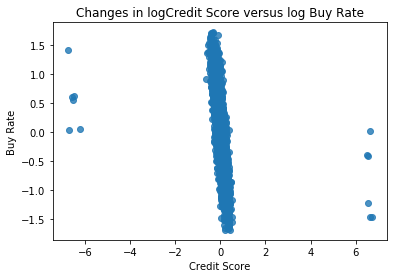

In [4]:
sns.regplot('Credit Score', 'Buy Rate', data=trans_data)
plt.title('Changes in log%s versus log %s' %('Credit Score', 'Buy Rate'))

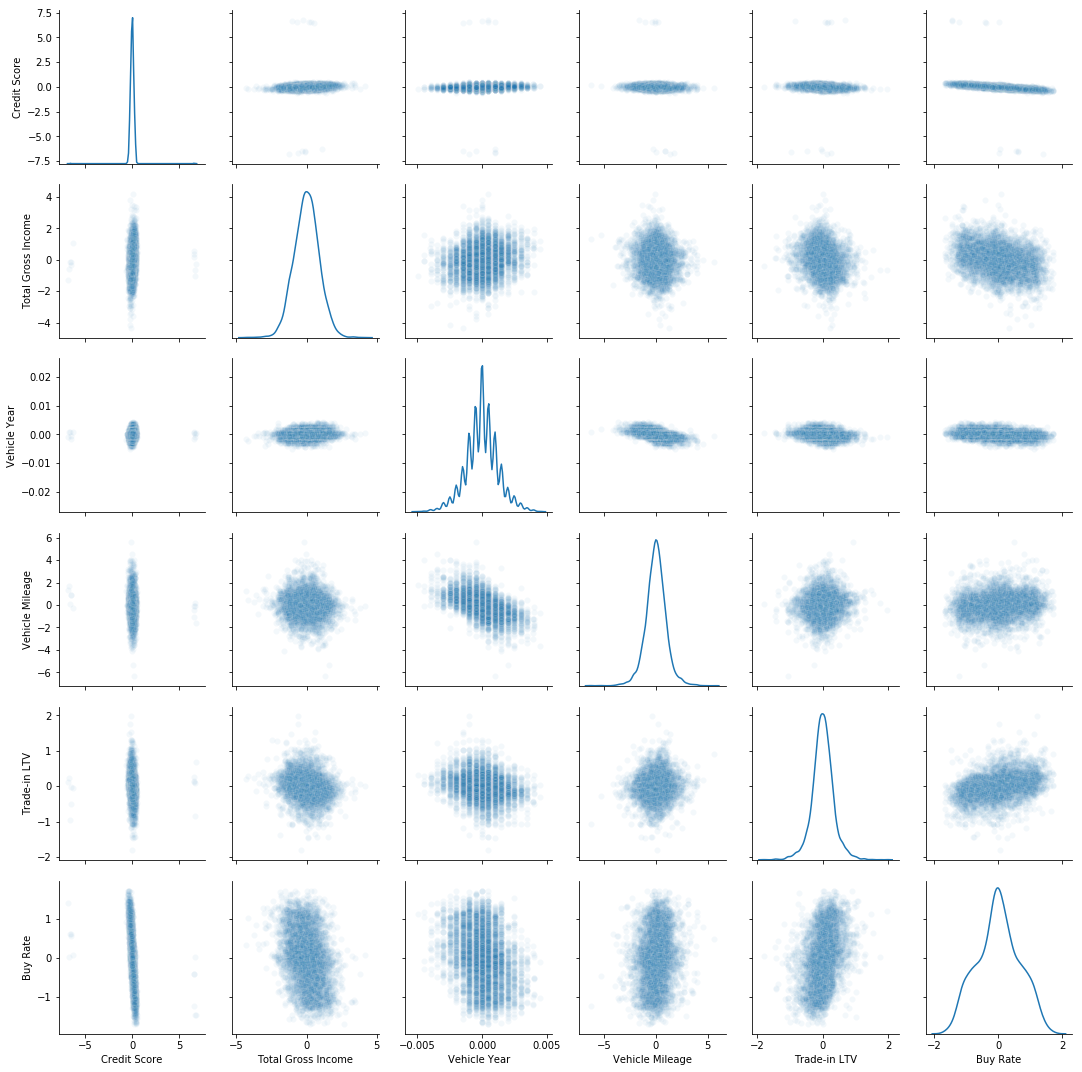

In [5]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.05})

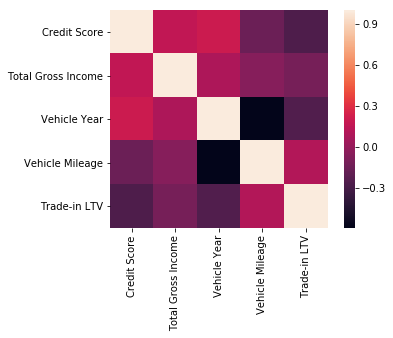

In [6]:
data2 = adr[['Lender', 'State','Credit Score', 'Total Gross Income', 'Vehicle Year', 'Vehicle Mileage', 'Trade-in LTV']]
cor = data2.corr()
sns.heatmap(cor, square = True)

In [7]:
def doKmeans(X, nclust=20):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data, 2)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

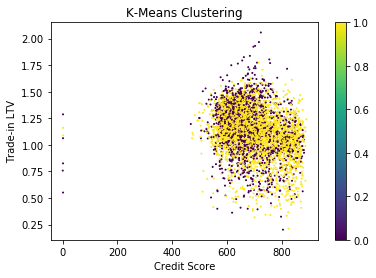

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Credit Score'],data['Trade-in LTV'],
                     c=kmeans[0],s=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Trade-in LTV')
plt.colorbar(scatter)

In [9]:
dfr = pd.DataFrame(adr)
dfr = dfr[dfr['Finance Type'] != 'Purchase']
dfp = pd.DataFrame(adr)
dfp = dfp[dfp['Finance Type'] != 'Refi']

<Figure size 200x200 with 0 Axes>

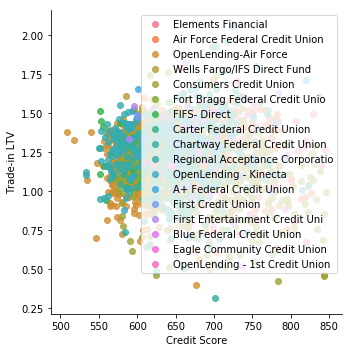

<Figure size 200x200 with 0 Axes>

In [10]:
sns.lmplot(x='Credit Score', y='Trade-in LTV', data=dfr, fit_reg=False, hue='Lender',
          legend=False)
plt.legend(loc='best')
plt.figure(figsize=(200,200), dpi=1)

<Figure size 200x200 with 0 Axes>

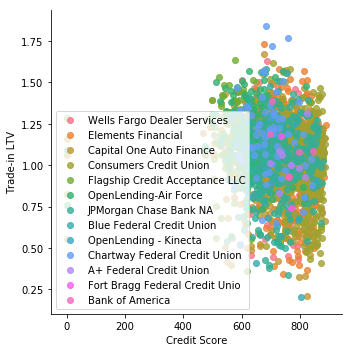

<Figure size 200x200 with 0 Axes>

In [11]:
sns.lmplot(x='Credit Score', y='Trade-in LTV', data=dfp, fit_reg=False, hue='Lender',
          legend=False)
plt.legend(loc='best')
plt.figure(figsize=(200,200), dpi=1)

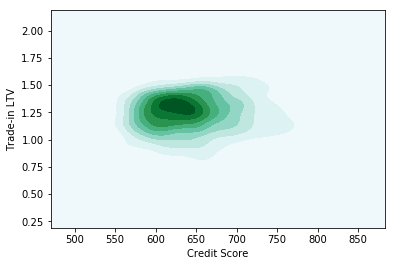

In [12]:
xr = dfr['Credit Score']
yr = dfr['Trade-in LTV']

ar = sns.kdeplot(xr, yr, shade=True)

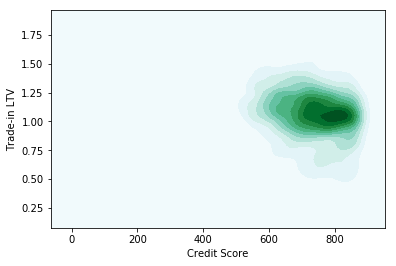

In [13]:
xp = dfp['Credit Score']
yp = dfp['Trade-in LTV']

ap = sns.kdeplot(xp, yp, shade=True)

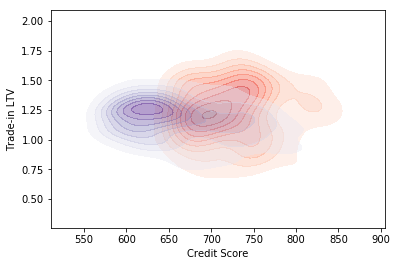

In [16]:
elements = dfr.loc[dfr['Lender'] == "Elements Financial"]
wfds = dfr.loc[dfr['Lender'] == "Wells Fargo Dealer Services"]
coaf = dfr.loc[dfr['Lender'] == "Capital One Auot Finance"]
ccu = dfr.loc[dfr['Lender'] == "Consumers Credit Union"]
flagship = dfr.loc[dfr['Lender'] == "Flagship Credit Acceptance LLC"]
olaf = dfr.loc[dfr['Lender'] == "Open Lending Air Force"]
chase = dfr.loc[dfr['Lender'] == "JPMorgan Chase Bank NA"]

ax = sns.kdeplot(elements['Credit Score'], elements['Trade-in LTV'],
                  cmap="Reds", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(wfds['Credit Score'], wfds['Trade-in LTV'],
                  cmap="Blues", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(coaf['Credit Score'], coaf['Trade-in LTV'],
                  cmap="Greens", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(ccu['Credit Score'], ccu['Trade-in LTV'],
                  cmap="Purples", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(flagship['Credit Score'], flagship['Trade-in LTV'],
                  cmap="Oranges", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(olaf['Credit Score'], olaf['Trade-in LTV'],
                  cmap="Greys", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(chase['Credit Score'], chase['Trade-in LTV'],
                  cmap="YlORBr", shade=True, shade_lowest=False, alpha=0.4)

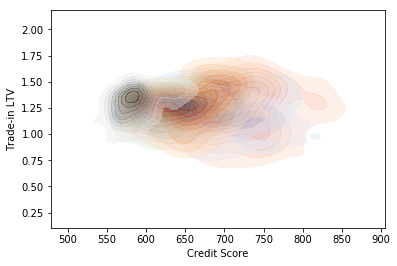

In [17]:
elements = dfr.loc[dfr['Lender'] == "Elements Financial"]
affcu = dfr.loc[dfr['Lender'] == "Air Force Federal Credit Union"]
olaf = dfr.loc[dfr['Lender'] == "OpenLending-Air Force"]
ccu = dfr.loc[dfr['Lender'] == "Consumers Credit Union"]
chartway = dfr.loc[dfr['Lender'] == "Chartway Federal Credit Union"]
regional = dfr.loc[dfr['Lender'] == "Regional Acceptance Corporatio"]

ax = sns.kdeplot(elements['Credit Score'], elements['Trade-in LTV'],
                  cmap="Reds", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(affcu['Credit Score'], affcu['Trade-in LTV'],
                  cmap="Blues", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(olaf['Credit Score'], olaf['Trade-in LTV'],
                  cmap="Greens", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(ccu['Credit Score'], ccu['Trade-in LTV'],
                  cmap="Purples", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(chartway['Credit Score'], chartway['Trade-in LTV'],
                  cmap="Oranges", shade=True, shade_lowest=False, alpha=0.4)
ax = sns.kdeplot(regional['Credit Score'], regional['Trade-in LTV'],
                  cmap="Greys", shade=True, shade_lowest=False, alpha=0.4)